## 手写k-means

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

# 解决坐标轴刻度负号乱码
plt.rcParams['axes.unicode_minus'] = False

# 解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['Simhei']

In [2]:
%matplotlib inline

#导入数据集
iris = pd.read_csv("iris.data",header = None)
iris.head()
iris.shape

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


(150, 5)

In [12]:
# 定义距离计算函数
def distEclud(arrA,arrB):
    d = arrA-arrB
    dist = np.sum(np.power(d,2),axis=1)
    return dist

In [5]:
# 定义随机生成质心函数
def randCent(dataSet,k):
    n = dataSet.shape[1] # 列数 维数
    data_max = dataSet.iloc[:,:n-1].max() # 前4列最大值 每一列
    data_min = dataSet.iloc[:,:n-1].min()
    data_cent = np.random.uniform(data_min,data_max,(k,n-1)) # 随机均分布抽样生成质心
    return data_cent

In [8]:
iris_count = randCent(iris,3)
iris_count

array([[7.63623427, 3.49815111, 5.23629574, 1.83069968],
       [6.47947576, 2.97489235, 3.73332571, 0.72792102],
       [5.17868257, 2.22006794, 4.55426787, 0.47371432]])

In [13]:
# 手写k-means算法
def kMeans(dataSet, k, distMeas=distEclud, createCent=randCent): # iris为150*5
    m,n = dataSet.shape # m是行数（数据量），n是列数iris为150*5
    
    # 下面生成的centroids，即第一个容器，后面用来存储最新更新的质心
    centroids = createCent(dataSet, k) # centroids为3*4，用三个长度为4的一维数组记载3个质心
    
    # 第一次centroids是随机生成的

    # 这段生成的result_set，即第二个容器
    # result_set结构： [数据集, 该行到最近质心的距离， 本次迭代中最近质心编号，上次迭代中最近质心编号]
    clusterAssment = np.zeros((m,3)) # clusterAssment为150*3的数组
    clusterAssment[:, 0] = np.inf # np.inf为无穷大
    clusterAssment[:, 1: 3] = -1 # 此时clusterAssment为150*3
    result_set = pd.concat([dataSet, pd.DataFrame(clusterAssment)],
                            axis=1,ignore_index = True) # 合并 result_set为150*8 
    
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        
        for i in range(m): # 遍历result_set中每一行，一共m行
            # 小心，下面的n为5，而resulit_set的列数已经变成8
            dist = distMeas(dataSet.iloc[i, :n-1].values, centroids) # 第i行与三个质心的距离,dist为3*1
            result_set.iloc[i, n] = dist.min() #result_set[i,n]记录该行与3个质心的最小距离
            result_set.iloc[i, n+1] = np.where(dist == dist.min())[0] # result_set[i,n]记录最近质心的索引
            clusterChanged = not (result_set.iloc[:, -1] == result_set.iloc[:,-2]).all()
            # 只要result_set最后两列不完全相等，意味着本次for循环结束时，m行所有的新质心与上次while循环留下的不完全一样
            # 后果：clusterChanged为True，while继续循环
        
        # clusterChanged为True，则需要运行下面的if语句代码块，重置第一个容器centroids和第二个容器result_set
        if clusterChanged:
            cent_df = result_set.groupby(n+1).mean() # 按照列索引为 n+1（质心索引）(第6列)进行分组求均值
            # 即：按照最新的簇分类，计算最新3个质心的位置
            centroids = cent_df.iloc[:,:n-1].values # 重置centroids，用最新质心位置，替换上次的。3*4
            result_set.iloc[:, -1] = result_set.iloc[:, -2] # result_set最后一列，本次的簇分类编码，替换掉上次的
    return centroids, result_set

In [14]:
iris_cent,iris_result = kMeans(iris, 3)
iris_cent
iris_result.head()

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ]])

,0,1,2,3,4,5,6,7
0,5.1,3.5,1.4,0.2,Iris-setosa,0.021592,2.0,2.0
1,4.9,3.0,1.4,0.2,Iris-setosa,0.191992,2.0,2.0
2,4.7,3.2,1.3,0.2,Iris-setosa,0.169992,2.0,2.0
3,4.6,3.1,1.5,0.2,Iris-setosa,0.269192,2.0,2.0
4,5.0,3.6,1.4,0.2,Iris-setosa,0.039192,2.0,2.0


## sklearn实现k-means

### 生成数据

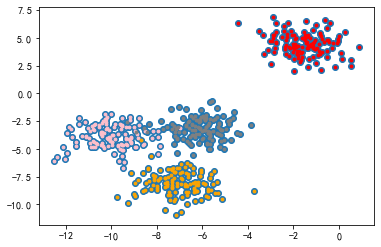

In [16]:
from sklearn.datasets import make_blobs

#自己创建数据集
X, y = make_blobs(n_samples=500,n_features=2,centers=4,random_state=1)
plt.scatter(X[:, 0], X[:, 1], marker='o')#点的形状 ,s=8 #点的大小

#查看分布
color = ["red","pink","orange","gray"]
for i in range(4):
    plt.scatter(X[y==i, 0], X[y==i, 1]
                ,marker='o' #点的形状
                ,s=8 #点的大小
                ,c=color[i]
                )
plt.show()

### k-means

In [17]:
from sklearn.cluster import KMeans

In [18]:
cluster = KMeans(n_clusters=3,random_state=0).fit(X)

cluster.labels_

array([2, 2, 0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 0, 1, 0, 2, 0, 2, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 1, 0,
       0, 2, 0, 0, 1, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 2, 0, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 2, 1, 0, 1, 0, 1, 0, 1, 0, 0, 2, 2, 0, 0, 0, 1, 2, 2, 0, 1, 0,
       0, 0, 0, 2, 1, 0, 1, 1, 0, 2, 0, 1, 1, 1, 0, 0, 2, 2, 0, 0, 1, 2,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 0, 1, 2, 0, 0, 2, 1, 0,
       0, 0, 0, 2, 0, 0, 1, 2, 2, 0, 0, 2, 2, 0, 1, 1, 2, 2, 0, 1, 0, 2,
       2, 1, 2, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1,
       0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 2, 0, 1, 1, 0, 2, 1, 2, 0, 0,
       2, 2, 2, 2, 0, 0, 2, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 2, 2, 0, 0, 0, 0, 1, 1, 0, 1, 0, 2, 1, 2, 1, 2, 2, 1, 2, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 2, 2, 0, 0,

In [25]:
y_pred = cluster.predict(X)
y_pred

array([2, 2, 0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 0, 1, 0, 2, 0, 2, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 1, 0,
       0, 2, 0, 0, 1, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 2, 0, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 2, 1, 0, 1, 0, 1, 0, 1, 0, 0, 2, 2, 0, 0, 0, 1, 2, 2, 0, 1, 0,
       0, 0, 0, 2, 1, 0, 1, 1, 0, 2, 0, 1, 1, 1, 0, 0, 2, 2, 0, 0, 1, 2,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 0, 1, 2, 0, 0, 2, 1, 0,
       0, 0, 0, 2, 0, 0, 1, 2, 2, 0, 0, 2, 2, 0, 1, 1, 2, 2, 0, 1, 0, 2,
       2, 1, 2, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1,
       0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 2, 0, 1, 1, 0, 2, 1, 2, 0, 0,
       2, 2, 2, 2, 0, 0, 2, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 2, 2, 0, 0, 0, 0, 1, 1, 0, 1, 0, 2, 1, 2, 1, 2, 2, 1, 2, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 2, 2, 0, 0,

In [20]:
cluster.cluster_centers_

array([[-8.09286791, -3.50997357],
       [-1.54234022,  4.43517599],
       [-7.0877462 , -8.08923534]])

In [22]:
cluster.inertia_ # 整体距离平方和

1903.5342237665059

## 聚类算法的模型评估指标：轮廓系数

- 轮廓系数越趋于1 越好

In [23]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

In [24]:
X

array([[-6.92324165e+00, -1.06695320e+01],
       [-8.63062033e+00, -7.13940564e+00],
       [-9.63048069e+00, -2.72044935e+00],
       [-2.30647659e+00,  5.30797676e+00],
       [-7.57005366e+00, -3.01446491e+00],
       [-1.00051011e+00,  2.77905153e+00],
       [-4.81826839e+00, -2.77214822e+00],
       [-5.33964799e+00, -1.27625764e+00],
       [-7.94308840e+00, -3.89993901e+00],
       [-5.54924525e+00, -3.41298968e+00],
       [-5.14508990e+00, -9.54492198e+00],
       [-7.09669936e+00, -8.04074036e+00],
       [-5.82641512e+00, -1.96346196e+00],
       [-1.83198811e+00,  3.52863145e+00],
       [-7.34267235e+00, -3.16546482e+00],
       [-7.34072825e+00, -6.92427252e+00],
       [-7.94653906e+00, -3.36768655e+00],
       [-8.24598536e+00, -8.61315821e+00],
       [-1.98197711e+00,  4.02243551e+00],
       [-4.35098035e+00, -3.69476678e+00],
       [-1.04768696e+01, -3.60318139e+00],
       [-1.10195984e+01, -3.15882031e+00],
       [-5.17255904e+00, -4.31835971e+00],
       [-2.

In [26]:
y_pred

array([2, 2, 0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 0, 1, 0, 2, 0, 2, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 1, 0,
       0, 2, 0, 0, 1, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 2, 0, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 2, 1, 0, 1, 0, 1, 0, 1, 0, 0, 2, 2, 0, 0, 0, 1, 2, 2, 0, 1, 0,
       0, 0, 0, 2, 1, 0, 1, 1, 0, 2, 0, 1, 1, 1, 0, 0, 2, 2, 0, 0, 1, 2,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 0, 1, 2, 0, 0, 2, 1, 0,
       0, 0, 0, 2, 0, 0, 1, 2, 2, 0, 0, 2, 2, 0, 1, 1, 2, 2, 0, 1, 0, 2,
       2, 1, 2, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1,
       0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 2, 0, 1, 1, 0, 2, 1, 2, 0, 0,
       2, 2, 2, 2, 0, 0, 2, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 2, 2, 0, 0, 0, 0, 1, 1, 0, 1, 0, 2, 1, 2, 1, 2, 2, 1, 2, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 2, 2, 0, 0,

In [27]:
silhouette_score(X,y_pred) # 计算所有样本的轮廓系数的均值

0.5882004012129721

In [28]:
silhouette_samples(X,y_pred) # 计算每个样本轮廓系数

array([ 0.62982017,  0.5034877 ,  0.56148795,  0.84881844,  0.56034142,
        0.78740319,  0.39254042,  0.4424015 ,  0.48582704,  0.41586457,
        0.62497924,  0.75540751,  0.50080674,  0.8452256 ,  0.54730432,
        0.60232423,  0.54574988,  0.68789747,  0.86605921,  0.25389678,
        0.49316173,  0.47993065,  0.2222642 ,  0.8096265 ,  0.54091189,
        0.30638567,  0.88557311,  0.84050532,  0.52855895,  0.49260117,
        0.65291019,  0.85602282,  0.47734375,  0.60418857,  0.44210292,
        0.6835351 ,  0.44776257,  0.423086  ,  0.6350923 ,  0.4060121 ,
        0.54540657,  0.5628461 ,  0.78366733,  0.37063114,  0.35132112,
        0.74493029,  0.53691616,  0.36724842,  0.87717083,  0.79594363,
        0.84641859,  0.38341344,  0.42043012,  0.4024608 ,  0.64639537,
        0.46244151,  0.31853572,  0.10047008,  0.37909034,  0.56424494,
        0.86153448,  0.82630007,  0.53288582,  0.35699772,  0.86994617,
        0.52259763,  0.71296285,  0.5269434 ,  0.42375504,  0.31

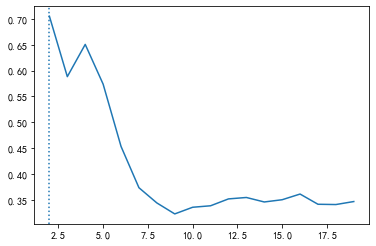

In [31]:
# 学习曲线
score = []

#k值0-20
for i in range(2,20):
    cluster = KMeans(n_clusters=i,random_state=0).fit(X)
    score.append(silhouette_score(X,cluster.labels_))
    
plt.plot(range(2,20),score)

plt.axvline(pd.DataFrame(score).idxmax()[0]+2,ls=':') # 最好的k画个线

## 一些参数

In [32]:
cluster_01 = KMeans(n_clusters = 8,init='k-means++').fit(X)
cluster_01.n_iter_ # 输出运行的迭代次数
silhouette_score(X,cluster_01.labels_)

10

0.3299902351657435

In [33]:
cluster_02 = KMeans(n_clusters = 8,init="random").fit(X)
cluster_02.n_iter_
silhouette_score(X,cluster_02.labels_)

14

0.3698150243827944